In [86]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import tensorflow as tf
import random
import keras
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, Normalization

import librosa

In [3]:
fileList = {}
emotionClass = {
    "Happy": 0,
    "Angry": 1,
    "Suprised": 2,
    "Sad": 3,
    "Fearful": 4,
    "Neutral": 5,
    "Disgusted": 6,
}
# KAGGLE ===================
# BASE_PATH = '/kaggle/input/audio-emotions/Emotions/'
# for emotion in os.listdir(BASE_PATH):
#     fileList[emotion] = []
#     for file in os.listdir(f"{BASE_PATH}/{emotion}"):
#         fileList[emotion].append(f"{BASE_PATH}{emotion}/{file}")

for emotion in os.listdir("./archive/Emotions"):
    fileList[emotion] = []
    counter = 0
    for file in os.listdir(f"{"./archive/Emotions"}/{emotion}"):
        fileList[emotion].append(f"{"./archive/Emotions/"}{emotion}/{file}")
        counter += 1
        if counter > 40: break

In [ ]:
for k, v in fileList.items():
    print(f"{k:10s} ==> {len(v)}")

# Lee el archivo WAV
sample_rate, data = wavfile.read(fileList["Neutral"][5])

In [122]:
train = []
max_length = -1
mfcc_number = 15
index = -1
counter = 0

# Calcula el espectrograma
for emotion, filePath in fileList.items():
    for file in filePath:
        # sample_rate, data = wavfile.read(file)

        y, sr   = librosa.load(file)
        mfcc    = librosa.feature.mfcc(y=y, n_mfcc=mfcc_number, sr=sr)
        mfcc = mfcc.T

        # frequencies, times, spectrogram_data = spectrogram(data, fs=sample_rate)
        # spectrogram_data = spectrogram_data.T

        train.append(
            (
                # spectrogram_data,
                mfcc,
                [emotionClass[emotion]],
            )
        )

        counter += 1

        if np.shape(mfcc)[0] > max_length:
            max_length = np.shape(mfcc)[0]
            index = counter

X_train = list(list(zip(*train))[0])
Y_train = list(list(zip(*train))[1])
print(Y_train)
# Y_train = list(map(lambda a: to_categorical([a], num_classes=7), Y_train))
Y_train = to_categorical(Y_train, num_classes=7)

for index, element in enumerate(X_train):
    original_shape = np.shape(element)[0]
    array_zeros = np.zeros((max_length, mfcc_number))
    array_zeros[:original_shape, :] = element
    X_train[index] = array_zeros

    # array_tag = to_categorical(np.array([Y_train[index]]), num_classes=7)
    # array_tag = np.repeat(array_tag, original_shape, axis=0)    
    # array_zeros = np.zeros((max_length, 7))
    # array_zeros[:original_shape, :] = array_tag

    # Y_train[index] = array_zeros  
# print(np.shape(Y_train))

np.concatenate(X_train, axis=0)
X_train = np.array(X_train)
# np.concatenate(Y_train, axis=0)
print(Y_train)


[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4], [4],

In [119]:
X_train[100][150]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [123]:
reshaped = np.zeros((287,213,7))
for i in range(0,287):
    for j in range(0,213):
        reshaped[i][j] = Y_train[i]

Y_train = reshaped

In [138]:
# Definir el modelo
model = Sequential()
model.add(Masking(mask_value=0, input_shape=(None, mfcc_number)))
model.add(Normalization(axis=None))
model.add(LSTM(512, input_shape=(None), return_sequences=True))
# model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar resumen del modelo
# model.summary()
model.fit(X_train, Y_train, epochs=20, batch_size=32, shuffle=True)

# model.fit(X_train, Y_train, epochs=40, batch_size=32, shuffle=True)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 436ms/step - accuracy: 0.1800 - loss: 2.0609
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.3257 - loss: 1.7487
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 409ms/step - accuracy: 0.3586 - loss: 1.6378
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 416ms/step - accuracy: 0.4317 - loss: 1.5208
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.4177 - loss: 1.4840
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.4620 - loss: 1.4600
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 426ms/step - accuracy: 0.4901 - loss: 1.3749
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/step - accuracy: 0.4942 - loss: 1.3533
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step - accuracy: 0.4806 - loss: 1.3133
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 416ms/step - accuracy: 0.5428 - loss: 1.2572
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 432ms/step - accuracy: 0.5766 - loss: 1.2325
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 429ms/step - accuracy: 0.5762 - lo

In [167]:
a = X_train[0]
print(type(a))
prediction = model.predict(X_train[30:31])

<class 'numpy.ndarray'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [159]:
prediction[0][:, 0].shape

(213,)

In [78]:
import matplotlib
import matplotlib.pyplot as plt


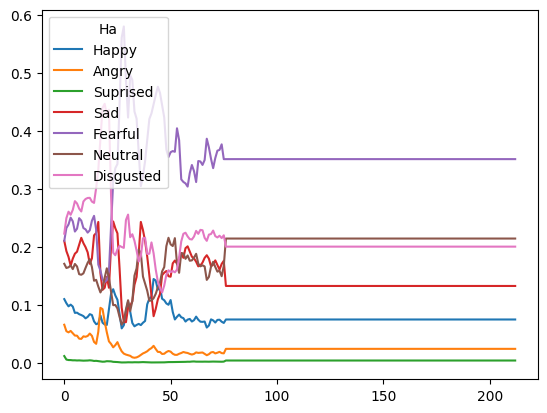

In [168]:
plt.plot(prediction[0][:, 0], label=list(emotionClass.keys())[list(emotionClass.values()).index(0)])
plt.plot(prediction[0][:, 1], label=list(emotionClass.keys())[list(emotionClass.values()).index(1)])
plt.plot(prediction[0][:, 2], label=list(emotionClass.keys())[list(emotionClass.values()).index(2)])
plt.plot(prediction[0][:, 3], label=list(emotionClass.keys())[list(emotionClass.values()).index(3)])
plt.plot(prediction[0][:, 4], label=list(emotionClass.keys())[list(emotionClass.values()).index(4)])
plt.plot(prediction[0][:, 5], label=list(emotionClass.keys())[list(emotionClass.values()).index(5)])
plt.plot(prediction[0][:, 6], label=list(emotionClass.keys())[list(emotionClass.values()).index(6)])

plt.legend(title="Ha")
plt.show()